## An introduction to time-series models 

This exercise will introduce you to the concepts of time series data, data transformations, and autocorrelation.

In [12]:
## Import necessary packages. It often makes sense to import all necessary packages in one cell
import Haver
Haver.path('C:\\Users\\RNAMG01\\Desktop\\python haver training\\US1PLUS\\')


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox as lb

In [14]:
## Import some data from the Haver us1plus database
## It is important to set the "dates" arguemtn to true for pandas
## It will bring the data in with the correct data structure.

rgdp=Haver.data(['gdph'], 'us1plus', dates=True)

In [15]:
## We can check the data and data type

print (rgdp.head())

              gdph
1947-03-31  2033.1
1947-06-30  2027.6
1947-09-30  2023.5
1947-12-31  2055.1
1948-03-31  2086.0


In [16]:
print (rgdp.dtypes)

gdph    float64
dtype: object


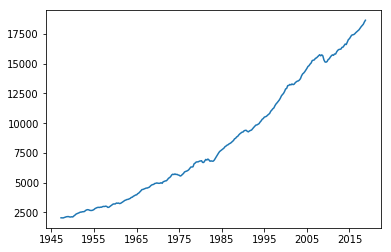

In [17]:
## It is always a good first step to look at your data. This can help
## catch any data errors, but also help you understand the data and any
## trends or cycles that may be present.

plt.plot(rgdp)

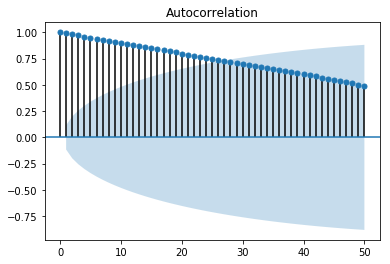

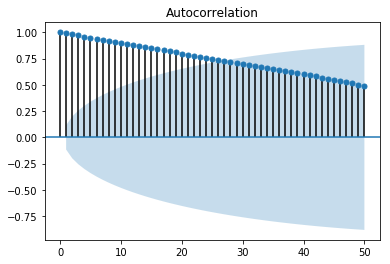

In [18]:
## Plot the correlogram up to 50 lags to look at the autocorrelations

plot_acf(rgdp, lags=50)

In [19]:
## The Ljung-Box test will check for serial correlation up to lag x. Null: No serial correlation Alt: Serial correlation

lb(rgdp, lags=25, boxpierce=False)

(array([ 284.08038111,  563.26894716,  837.63165563, 1107.19460399,
        1371.99272109, 1632.08987373, 1887.53988054, 2138.35507899,
        2384.53606658, 2626.08679473, 2863.03915834, 3095.39261686,
        3323.16422328, 3546.38040088, 3765.14729958, 3979.55150501,
        4189.62165886, 4395.48820301, 4597.2809947 , 4794.92749279,
        4988.49402353, 5178.0371476 , 5363.54776765, 5545.13108259,
        5722.78242997]),
 array([9.69243565e-064, 4.87194313e-123, 2.98250516e-181, 2.08797021e-238,
        1.61198801e-294, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000]))

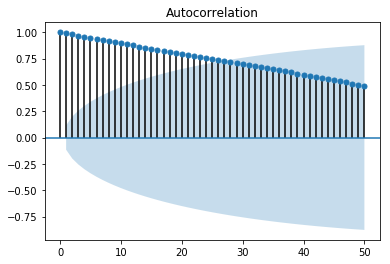

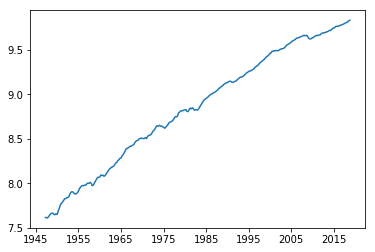

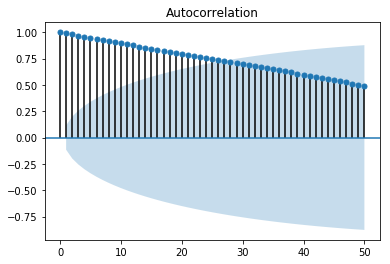

In [20]:
## Take the natural log of the data. Why might we want to do this?

lrgdp=np.log(rgdp)

plt.plot(lrgdp)

plot_acf(lrgdp, lags=50)

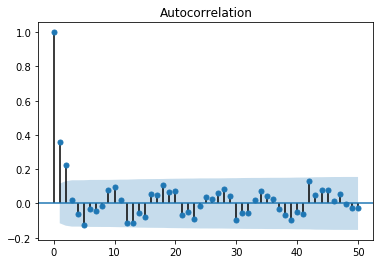

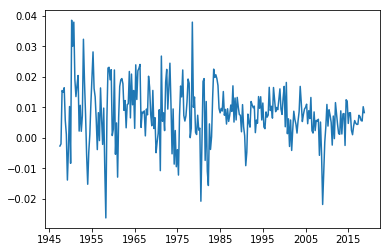

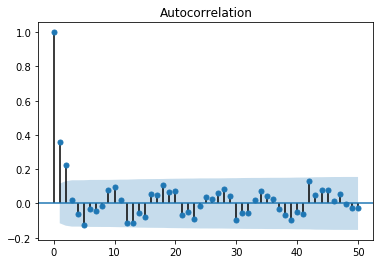

In [21]:
## Take the difference of the logs and look at the ACF.

dlrgdp=lrgdp-lrgdp.shift()

plt.plot(dlrgdp)

plot_acf(dlrgdp [1:], lags=50)

In [22]:
lb(dlrgdp [1:], lags=25, boxpierce=False)

(array([37.48214103, 52.43833397, 52.53833942, 53.54939013, 58.18226938,
        58.48240513, 59.00161748, 59.05051221, 60.91668103, 63.62951253,
        63.74279386, 67.49185605, 71.40965429, 72.32290308, 74.17365299,
        75.05668431, 75.88054557, 79.31180639, 80.71215821, 82.27080451,
        83.70047022, 84.43171011, 87.16254463, 87.23376367, 87.61364449]),
 array([9.22538400e-10, 4.10355689e-12, 2.29966718e-11, 6.53953666e-11,
        2.88456491e-11, 9.14849854e-11, 2.38807269e-10, 7.15479748e-10,
        8.92317512e-10, 7.40639217e-10, 1.85598486e-09, 9.40739687e-10,
        4.41154633e-10, 7.30404194e-10, 7.98141959e-10, 1.27752820e-09,
        2.04744035e-09, 1.13042933e-09, 1.40132519e-09, 1.61075117e-09,
        1.92592524e-09, 2.98138955e-09, 2.11776710e-09, 4.11660764e-09,
        6.98686405e-09]))

In [70]:
## Lets estimate an AR(1) model for real GDP

model = ARIMA(lrgdp, order=(1, 1, 0)) 

In [71]:
## Look at the regression summary. 

results_AR1 = model.fit(disp=-1)
print(results_AR1.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.gdph   No. Observations:                  286
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 950.506
Method:                       css-mle   S.D. of innovations              0.009
Date:                Thu, 17 Jan 2019   AIC                          -1895.012
Time:                        14:36:49   BIC                          -1884.044
Sample:                    06-30-1947   HQIC                         -1890.615
                         - 09-30-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0077      0.001      9.614      0.000       0.006       0.009
ar.L1.D.gdph     0.3605      0.055      6.537      0.000       0.252       0.469
                                    Roots   

In [48]:
model3 = ARIMA(lrgdp, order=(3,1,0))

In [72]:
model3 = ARIMA(lrgdp, order=(3,1,0))
results_AR3 = model3.fit(disp=-1)
print(results_AR3.summary())
#df = pd.DataFrame(results_AR.cov_params())


                             ARIMA Model Results                              
Dep. Variable:                 D.gdph   No. Observations:                  286
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 954.159
Method:                       css-mle   S.D. of innovations              0.009
Date:                Thu, 17 Jan 2019   AIC                          -1898.319
Time:                        14:37:14   BIC                          -1880.039
Sample:                    06-30-1947   HQIC                         -1890.992
                         - 09-30-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0077      0.001      9.586      0.000       0.006       0.009
ar.L1.D.gdph     0.3331      0.059      5.676      0.000       0.218       0.448
ar.L2.D.gdph     0.1491      0.061      2.43

In [97]:
AR1 = results_AR1.params[0]/(1-results_AR1.params[1])*400
print(AR1)

AR3 = results_AR3.params[0]/(1-sum(results_AR3.params[1:]))*400
print(AR3)

4.836248468314468
4.904306202133359


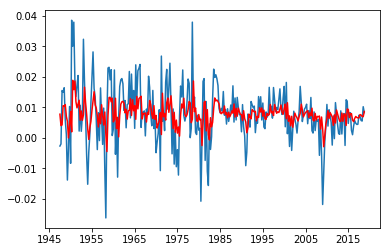

In [25]:
## We can plot the actual series (dlog of real GDP) against the fitted

plt.plot(dlrgdp)
plt.plot(results_AR.fittedvalues, color='red')